<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/DIP_course_5th_session_Histogram_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intensity level slicing

A modified version of simple thresholding is to slice intensity into multiple gray levels. When slicing, every interval of intensities is assigned to a single value.

This is just like multi-thresholding...


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

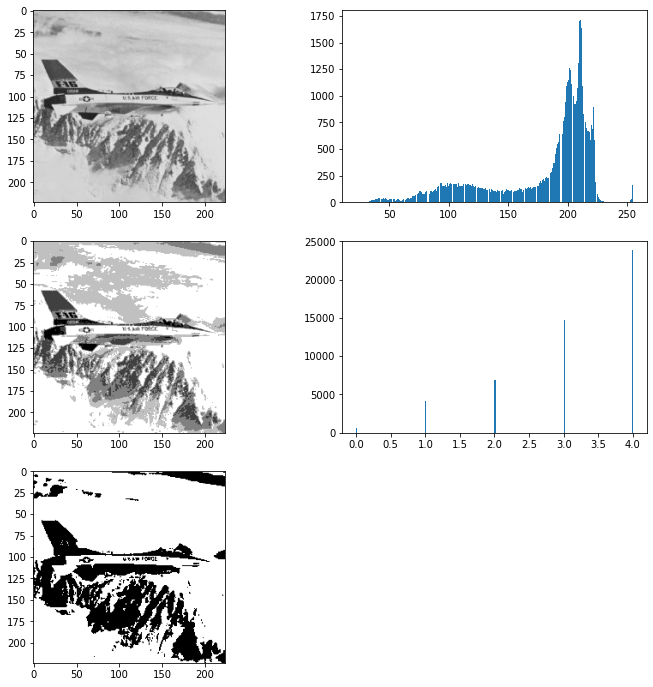

In [49]:
image = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/airplane_grayscale.jpg?raw=true')
image = image[:, :, 0]

plt.figure(figsize=(12, 12))
plt.subplot(321)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(322)
plt.hist(image.ravel(), bins=256)

thresholded = image > 170

sliced = np.zeros_like(image)
sliced[image >  50] = 1
sliced[image > 100] = 2
sliced[image > 150] = 3
sliced[image > 200] = 4


plt.subplot(323)
plt.imshow(sliced, cmap='gray')
plt.subplot(324)
plt.hist(sliced.ravel(), bins=256)

plt.subplot(325)
plt.imshow(thresholded, cmap='gray')

plt.show()

# Histogram Equalization
Histogram equalization is a method to process images in order to adjust the contrast of an image by modifying the intensity distribution of the histogram. The objective of this technique is to give a linear trend to the cumulative probability function associated to the image.

The processing of histogram equalization relies on the use of the cumulative probability function (cdf). The cdf is a cumulative sum of all the probabilities lying in its domain and defined by:

![Histogram Equalization](http://s13.picofile.com/file/8398065676/equalization.png)


![Camera man equalization](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/_images/histeq.png)





In [0]:
mri = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/MRI-spine1.tif?raw=true')
cameraman = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/cameraman.tif?raw=true')
pout = imread('https://github.com/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/data/pout.jpg?raw=true')

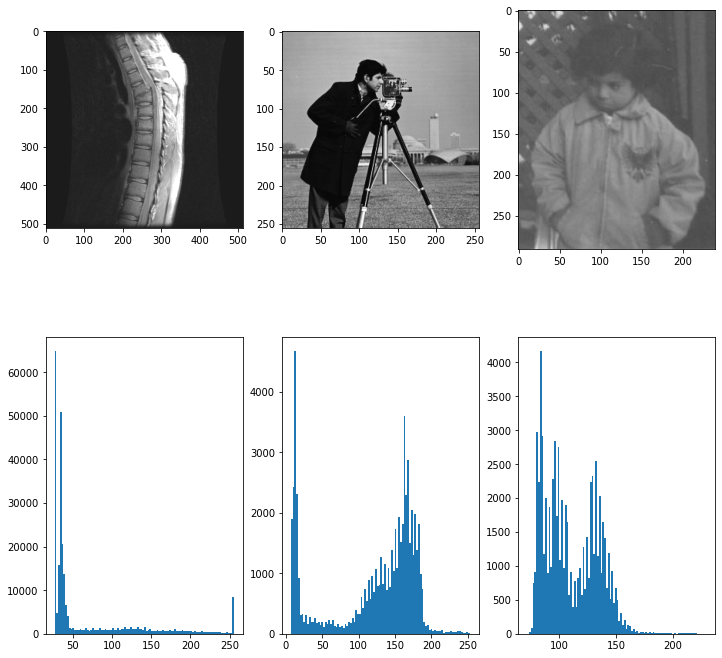

In [51]:
plt.figure(figsize=(12, 12))

plt.subplot(231), plt.imshow(mri, cmap='gray', vmin=0, vmax=255)
plt.subplot(234), plt.hist(mri.ravel(), bins=100)

plt.subplot(232), plt.imshow(cameraman, cmap='gray', vmin=0, vmax=255)
plt.subplot(235), plt.hist(cameraman.ravel(), bins=100)

plt.subplot(233), plt.imshow(pout, cmap='gray', vmin=0, vmax=255)
plt.subplot(236), plt.hist(pout.ravel(), bins=100)

plt.show()

In [0]:
image = cameraman
Min = np.amin(image)
# Min = 10
Max = np.amax(image)
# Max = 180
stretched = (image - Min) / (Max - Min) * 255

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(122), plt.imshow(stretched, cmap='gray', vmin=0, vmax=255)
plt.show()

Let f:D→[0,1]∈R be a scalar image with histogram h(f). Histogram equalization constructs an image point operator Ψ such that the resultant image Ψ(f) has a constant histogram, meaning that all scalar values in the resultant image are equally probable.



![Eq Steps](http://s12.picofile.com/file/8398102900/equalization_steps.PNG)



In [0]:
def histogramEqualization(f, bins=100):
    his, be = np.histogram(f, bins=bins)
    his = his.astype(float)/sum(his)
    return np.interp(f, be, np.hstack((np.zeros((1)), np.cumsum(his))))

In [0]:
image = pout

plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(image, cmap='gray', vmin=0, vmax=255)
histo, range = np.histogram(image, bins=100)
plt.subplot(222), plt.bar(range[:-1], histo)

Eq = histogramEqualization(image)
plt.subplot(223), plt.imshow(Eq, cmap='gray')
histo, range = np.histogram(Eq, bins=100)
plt.subplot(224), plt.bar(range[:-1], histo)

plt.show()

In [0]:
image = pout
histo, range = np.histogram(image, bins=100)
cdf_1 = np.cumsum(histo)

Eq = histogramEqualization(image)
histo, range = np.histogram(Eq, bins=100)
cdf_2 = np.cumsum(histo)

plt.figure()
plt.plot(cdf_1, 'k')
plt.plot(cdf_2, 'r')
plt.show()

![formula](https://t1.daumcdn.net/cfile/tistory/99859B465CF2298E20)


In [0]:
from skimage import exposure


plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(cameraman, cmap='gray', vmin=0, vmax=255)
histo, range = np.histogram(cameraman, bins=100)
plt.subplot(222), plt.bar(range[:-1], histo)
# Equalization
Eq = exposure.equalize_hist(image)
plt.subplot(223), plt.imshow(Eq, cmap='gray')
histo, range = np.histogram(Eq, bins=100)
plt.subplot(224), plt.bar(range[:-1], histo)

plt.show()

# Histogram Matching

Histogram matching is the process to make multiple images seem like eachother.

![matching](https://www.researchgate.net/profile/Ahmad_Shahrizan_Abdul_Ghani2/publication/317560583/figure/fig3/AS:504719627624449@1497345944827/The-process-of-histogram-matching-21_W640.jpg)


![matching](https://upload.wikimedia.org/wikipedia/commons/e/eb/Histogram_matching.PNG)


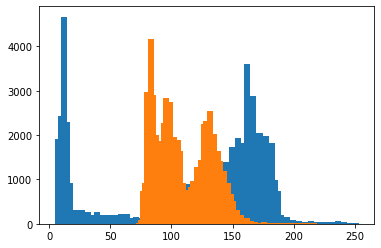

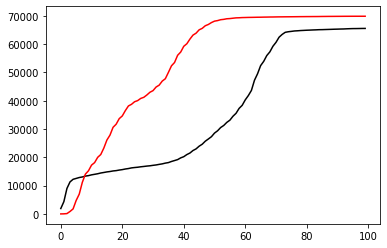

In [100]:
hist = np.histogram(cameraman.ravel(), bins=100)
plt.bar(hist[1][:-1], hist[0], width=5)
cdf_1 = np.cumsum(hist[0])

hist = np.histogram(pout.ravel(), bins=100)
plt.bar(hist[1][:-1], hist[0], width=5)
cdf_2 = np.cumsum(hist[0])

plt.figure()
plt.plot(cdf_1, 'k')
plt.plot(cdf_2, 'r')

In [0]:
from skimage.exposure import match_histograms

reference = cameraman
image = mri

matched = match_histograms(image, reference, multichannel=False)

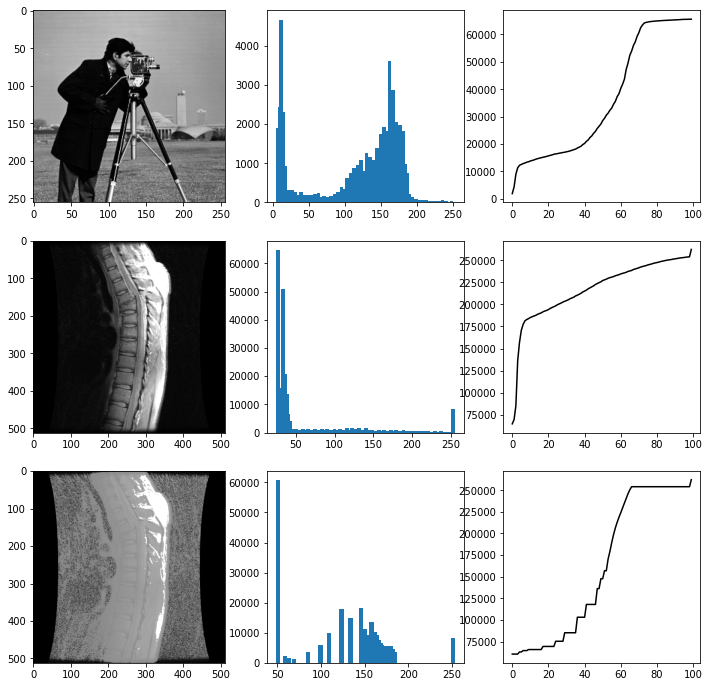

In [104]:
plt.figure(figsize=(12, 12))

image = cameraman
hist = np.histogram(image.ravel(), bins=100)
plt.subplot(331)
plt.imshow(image, cmap='gray')
plt.subplot(332)
plt.bar(hist[1][:-1], hist[0], width=5)
plt.subplot(333)
plt.plot(np.cumsum(hist[0]), 'k')


image = mri
hist = np.histogram(image.ravel(), bins=100)
plt.subplot(334)
plt.imshow(image, cmap='gray')
plt.subplot(335)
plt.bar(hist[1][:-1], hist[0], width=5)
plt.subplot(336)
plt.plot(np.cumsum(hist[0]), 'k')

image = matched
hist = np.histogram(image.ravel(), bins=100)
plt.subplot(337)
plt.imshow(matched, cmap='gray')
plt.subplot(338)
plt.bar(hist[1][:-1], hist[0], width=5)
plt.subplot(339)
plt.plot(np.cumsum(hist[0]), 'k')

plt.show()